In [1]:
import pandas as pd

In [2]:
students = pd.read_csv("estudiantesCCOMcursos.csv", 
                           dtype='str', 
                           header=None, 
                           names=["ID", "Semester", "Course"])

In [3]:
students.iloc[:5,1:3]

,Semester,Course
0,921,BIOL3011
1,921,CISO3122
2,921,MATE3171
3,921,QUIM3001
4,922,ESPA3101


In [4]:
def makesequences(table):
    sequences = {}
    
    for index, ID, Semester, Course in students.itertuples():
        if ID not in sequences:
            sequences[ID] = [(Course, Semester)]
        else:
            sequences[ID].append((Course, Semester))
    
    return sequences

In [5]:
def codetonum(code):
    decade = code[0] 
    year = code[1]
    semester = code[2]
    time = 1900 + int(decade, base=16) * 10 + int(year) + 0.5 * (int(semester) - 1)
    return time

In [6]:
sequences = makesequences(students)

In [7]:
len(sequences.keys())

476

In [8]:
prog2011 = ['MATE3018', 'MATE3023', 'MATE3024', # should have tested out of these pre calc
            'MATE3151', 'CCOM3030', 'CCOM3981', # espa soc eng
            'CCOM3020', 'CCOM3033', 'CCOM3982', # soc espa eng
            'MATE3152', 'CCOM3034', 'CCOM4016', 'CCOM4086', # sci huma
            'MATE4081', 'MATE4032', 'CCOM4027', 'CCOM4029', # sci huma
            'MATE4080', 'CCOM4017', 'CCOM4030', # libre lite
            'CCOM5050', 'CCOM4065', 'CCOM4205', # art lite
            'MATE5001', 'CCOM5035', 'CCOM4995', # SCI SCI
            'CCOM4996', 'CCOM4087']

In [9]:
prog2016 = ['MATE3018', 'MATE3023', 'MATE3024', # should have tested out of these pre calc
            'MATE3151', 'CCOM3030', 'CCOM3981', # espa soc eng
            'CCOM3020', 'CCOM3033', 'CCOM3982', # soc espa eng
            'MATE3152', 'CCOM3034', 'CCOM4086', # sci huma
            'MATE4081', 'MATE4032', 'CCOM4027', 'CCOM4029', # sci huma
            'MATE4080', 'CCOM4017', 'CCOM4030', # libre lite
            'CCOM5050', 'CCOM4065', 'CCOM4205', # art lite
            'MATE5001', 'CCOM5035', 'CCOM4995', # SCI SCI
            'CCOM4996', 'CCOM4087']

In [10]:
def clean(students, core):
    "Filter students, return only core courses"
    clean = {}
    for student, courselist in students.items():
        cleanlist = []
        for course, sem in courselist:
            if course in core:
                cleanlist.append((course, sem))
        if len(cleanlist) > 0:
            clean[student] = cleanlist
    return clean

In [11]:
newstu = clean(sequences, prog2011)

In [12]:
from collections import defaultdict

In [13]:
def getseq(students):
    freqs = defaultdict(int)
    for student in students.keys():
        for i in range(len(students[student])):
            course, elapsed = students[student][i]
            freqs[course] += i
    return list(map(lambda item: item[0], sorted(freqs.items(), key=lambda item: (item[1], item[0]))))

In [14]:
cs_seq = getseq(newstu)

In [15]:
cs_seq

['CCOM4065',
 'MATE3018',
 'CCOM4205',
 'CCOM3030',
 'CCOM4016',
 'CCOM4996',
 'MATE3023',
 'CCOM3981',
 'MATE3024',
 'MATE4081',
 'CCOM3982',
 'CCOM4029',
 'MATE5001',
 'CCOM4030',
 'CCOM3020',
 'CCOM3033',
 'CCOM3034',
 'MATE3151',
 'CCOM4086',
 'CCOM4027',
 'CCOM4017',
 'MATE4032',
 'CCOM4995',
 'CCOM5035',
 'MATE3152',
 'MATE4080',
 'CCOM4087',
 'CCOM5050']

In [16]:
import numpy as np

In [17]:
rows = len(cs_seq)
counts = np.zeros(rows * rows).reshape(rows,rows)

In [18]:
for stu in newstu:
    courses = [course for course, sem in newstu[stu] if course in cs_seq]
    courses = list(dict.fromkeys(courses)) # unique, preserving order, first occurrence
    for i in range(len(courses)):
        row = cs_seq.index(courses[i])
        counts[row,i] += 1

In [19]:
counts = pd.DataFrame(counts, index=cs_seq)

In [20]:
%matplotlib inline

In [21]:
import seaborn as sns; sns.set()

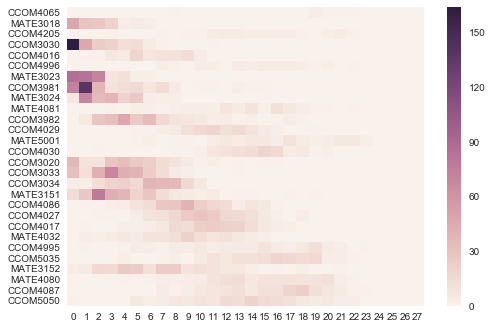

In [22]:
ax = sns.heatmap(counts)

In [23]:
def heatmap(students, cs_seq):
    rows = len(cs_seq)
    cols = 17
    counts = np.zeros(rows * cols).reshape(rows,cols)
    counts = pd.DataFrame(counts, index=cs_seq)
    for stu in students:
        courses = [(course, sem) for course, sem in students[stu] if course in cs_seq]
        #print(courses)
        courses = semesters(courses)
        for i in range(len(courses)):
            course, sem = courses[i]
            #print(course)
            row = cs_seq.index(course)
            if sem >= cols:
                sem = cols-1
            counts.iat[row,sem] += 1
    return counts

In [24]:
def codetosem(code):
    decade = code[0] 
    year = code[1]
    semester = code[2]
    time = 1900 + int(decade, base=16) * 10 + int(year) + 0.5 * (int(semester) - 1)
    return time

In [25]:
def semesters(courses):
    "Read a list of course, semester tuples and write out relative timeline"
    course, start = courses[0]
    first_sem = codetosem(start)
    last_sem = 0
    sequence = []
    for course, semester in courses:
        now = codetonum(semester)
        
        elapsed = now-first_sem
        elapsed *= 2
        sequence.append((course, int(elapsed)))
    return sequence

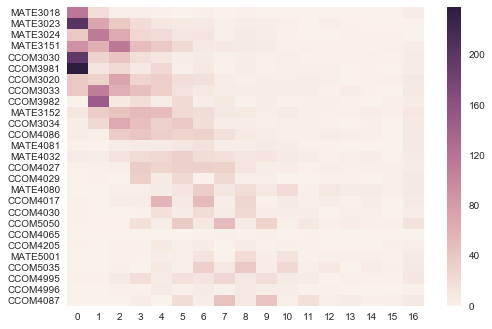

In [26]:
ax = sns.heatmap(heatmap(clean(sequences, prog2016), prog2016),cmap = None)

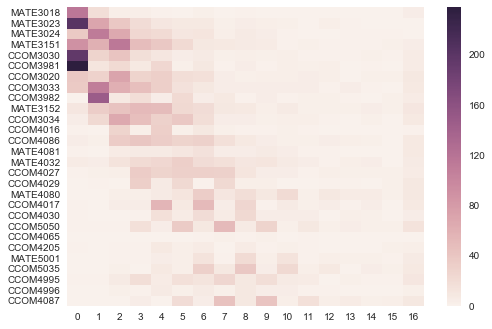

In [27]:
ax = sns.heatmap(heatmap(clean(sequences, prog2011), prog2011),cmap = None)

CCOM4016 was a pre-requisite for CCOM4086 until 2011. What is now MATE4081 was MATE4032 until two years ago.

Find students that took precalc in UPR

In [28]:
def took(courses, course):
    "Return true if student took a given course"
    return course in list(map(lambda row: row[0], courses))

In [29]:
precalc_stu = {k: v for k, v in sequences.items() if (took(v, 'MATE3018') or took(v, 'MATE3024'))}

In [30]:
len(dict(precalc_stu))

318

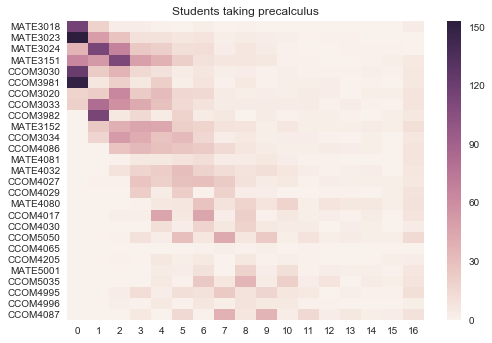

In [31]:
ax = sns.heatmap(heatmap(clean(precalc_stu, prog2016), prog2016),cmap = None)
ax.set(title="Students taking precalculus")

In [32]:
calc_stu = {k: v for k, v in sequences.items() if (not took(v, 'MATE3018') and not took(v, "MATE3024"))}

In [33]:
len(calc_stu)

158

In [34]:
318+158 # sanity check, do I still have all the students?

476

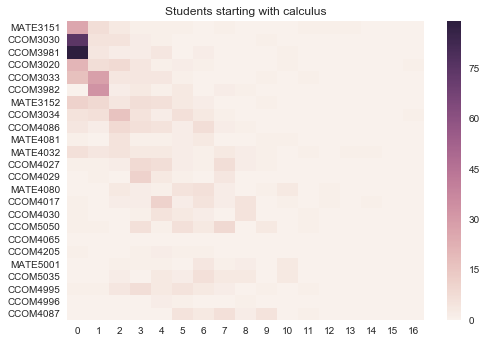

In [40]:
ax = sns.heatmap(heatmap(clean(calc_stu, prog2016[3:]), prog2016[3:]), cmap = None)
ax.set(title="Students starting with calculus")